# **Credit Card Fraud Detection Project**

# **Importing** **Libraries**



In [ ]:
import pandas as pd
import numpy as np 
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
ccdata = pd.read_csv("/content/drive/MyDrive/DATASETS /creditcard.csv")
print("INFORMATION ABOUT THE DATA SET")
print(ccdata.info())
print(" DESCRIPTION ABOUT THE DATA")
print(ccdata.describe())
print(ccdata.shape)

INFORMATION ABOUT THE DATA SET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 no

In [ ]:
#checking whethere dataset contain any null value in it 
ccdata.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
normal_data = ccdata[ccdata["Class"]==0]
fraud_data = ccdata[ccdata["Class"]==1]
print(normal_data.head(3))
print(fraud_data.head(3))
Labels = ["normal_data","fraud_data"]

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]
        Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522

## **Data Analysing**

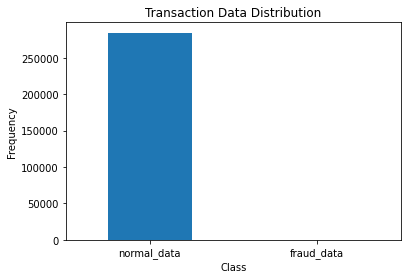

In [ ]:
#visualizing the normal data and fruad using the bar chat 
class_count = pd.value_counts(ccdata["Class"], sort =True)
class_count.plot(kind="bar", rot=0)
plt.xticks(range(2),Labels)
plt.title("Transaction Data Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

## **Data Preprocessing**

In [ ]:
ccdata1 = ccdata.sample(frac=0.1, random_state=2)
print(ccdata1.shape)
new_normal_data = ccdata1[ccdata["Class"]==0]
print(new_normal_data.Amount.describe())
new_fraud_data = ccdata1[ccdata["Class"]==1]
print(new_fraud_data.Amount.describe())

(28481, 31)
count    28442.000000
mean        89.213563
std        234.093267
min          0.000000
25%          5.900000
50%         22.415000
75%         79.000000
max       6900.470000
Name: Amount, dtype: float64
count      39.000000
mean      117.654872
std       249.152491
min         0.000000
25%         1.000000
50%        19.590000
75%        99.990000
max      1335.000000
Name: Amount, dtype: float64


<ipython-input-15-aa41859bb8c5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_normal_data = ccdata1[ccdata["Class"]==0]
<ipython-input-15-aa41859bb8c5>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_fraud_data = ccdata1[ccdata["Class"]==1]


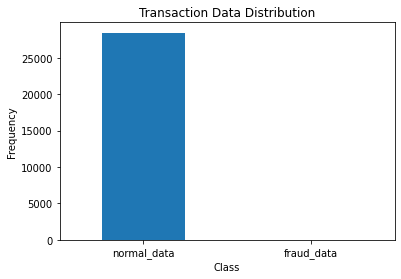

In [ ]:
#visualizing the sample data 
Labels1 = ["normal_data","fraud_data"]
class_count1 = pd.value_counts(ccdata1["Class"], sort =True)
class_count1.plot(kind="bar", rot=0)
plt.xticks(range(2),Labels1)
plt.title("Transaction Data Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()


In [ ]:
#defining X and Y for train and test split 
X=ccdata1.drop(["Class"],axis=1)
X.shape
y=ccdata1["Class"]
y
print(X)
print(y)


            Time        V1        V2        V3        V4        V5        V6  \
225184  144140.0 -0.581460  0.950267  0.115938 -1.384767  1.388364 -1.595678   
116637   74369.0  0.686730 -0.785586  0.945092  1.476634 -1.191074 -0.193185   
99414    67107.0 -0.848395  1.214313  0.954869 -0.030145 -0.177527 -0.851855   
217619  140965.0 -1.104465  0.616952 -0.878973 -0.312839 -0.092112 -0.020623   
279878  169155.0  2.061985 -0.114758 -1.079406  0.427062 -0.229701 -1.241109   
...          ...       ...       ...       ...       ...       ...       ...   
127873   78502.0  1.453030 -1.070431  0.540073 -1.396774 -1.516549 -0.679109   
165338  117364.0  2.297019 -0.695686 -3.856079 -1.984919  2.663435  2.575788   
277161  167496.0 -0.320339  1.294348 -0.922355 -0.831416  0.984983 -0.257539   
3391      2920.0 -0.420869  0.636084  0.966402 -2.281050  0.614989 -0.511806   
15091    26438.0 -0.730156  0.663608  2.517347  0.083831  0.096398  0.002281   

              V7        V8        V9  .

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train)
print(y_train)

            Time        V1        V2        V3        V4        V5        V6  \
241600  151092.0  0.050566  0.911121 -0.472633 -0.186083  0.962961 -0.264166   
135091   81104.0  1.188785  0.339159  0.274043  1.068503 -0.037511 -0.481178   
166027  117817.0  2.045327  0.074602 -2.056365  0.388115  0.472078 -1.088136   
248315  153887.0 -0.422932  1.693113 -1.266423 -0.075234  0.236511 -1.344582   
190628  128913.0  2.041393 -1.692932 -0.403631 -1.376681 -1.753600 -0.775670   
...          ...       ...       ...       ...       ...       ...       ...   
205306  135682.0  1.994168  0.464542 -2.395714  1.471247  1.049269 -0.885607   
9752     14483.0  1.179929 -0.071517  0.805718  0.035181 -0.648756 -0.325059   
56441    47427.0 -1.777496 -0.838617  1.805236 -1.286026 -0.292888 -1.289007   
234855  148145.0  0.082324  0.938237 -0.344531 -0.630135  0.896265 -0.513362   
70166    53741.0  0.998215 -0.659059  1.021522  0.268321 -1.067500  0.124144   

              V7        V8        V9  .

In [ ]:
# definig outlier fraction for the usage of isolation forest
outlier_fraction = len(new_fraud_data)/float(len(new_normal_data))
print("outlier_fraction : ",outlier_fraction)
print(" Number of Fraud cases : {}".format(len(new_fraud_data)))
print(" Number of Valid cases : {}".format(len(new_normal_data)))


outlier_fraction :  0.0013712115884958864
 Number of Fraud cases : 39
 Number of Valid cases : 28442


In [ ]:
#modeling the dataset
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=outlier_fraction,max_features=1.0)
model.fit(X)
 
 #Predictions on the test data
pred_y = model.predict(X)
# Reshaping the values
pred_y[pred_y == 1] = 0
pred_y[pred_y == -1] = 1
n_errors = (pred_y != y).sum()
print(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


            Time        V1        V2        V3        V4        V5        V6  \
259734  159248.0  2.009233  0.134929 -1.719846  0.412710  0.372335 -0.879987   
126981   78168.0  1.303345  0.326268 -0.162746  1.172043  0.212267 -0.394796   
238613  149743.0  2.079286 -0.005002 -2.032459 -0.024342  0.354048 -1.508465   
91401    63452.0 -0.888749  1.457758  2.138158  2.681105 -0.214845  1.390949   
147936   89175.0  2.066109  0.222716 -1.673811  0.405819  0.523276 -0.786737   
...          ...       ...       ...       ...       ...       ...       ...   
234845  148140.0 -0.033277  1.085379 -0.983018 -1.172865  1.540958 -1.376202   
142883   84996.0 -0.683185  0.318044  1.253572 -0.619177 -0.117377  1.421855   
50103    44348.0 -0.356236  1.088176  1.181898 -0.133526  0.256354 -0.468200   
137477   82176.0  0.366622  0.752213  0.644347  0.228971  0.847522  0.023902   
8307     11088.0  1.197748  0.274781  0.088700  1.203128  0.614772  0.879713   

              V7        V8        V9  .

#**RESULTS**

In [ ]:
#OBTAINED RESULTS 
print(" ISOLATION FOREST :",n_errors)
print("Accuracy is :", metrics.accuracy_score(pred_y,y))
print(" AUC Score is ",metrics.roc_auc_score(pred_y,y))                                          
print("Classification Report :")
print(metrics.classification_report(pred_y,y))

 ISOLATION FOREST : 47
Accuracy is : 0.9983497770443454
 AUC Score is  0.699595654161246
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28441
           1       0.41      0.40      0.41        40

    accuracy                           1.00     28481
   macro avg       0.70      0.70      0.70     28481
weighted avg       1.00      1.00      1.00     28481

